In [1]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

config_path = "./config_guangzhou.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        # for inner_it in range(INNER_ITER):
        for inner_it in range(INNER_ITER):
        


            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        # if T_id % EVALU_T == 0 or T_id == model.T - 1:

        #     # we only need  this to get the running metric, otherwise we can skip this
        #     # model.inner_smooth()
            
        #     _, loss_dict = model.model_test(T_id)
        #     print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
        #      loss_dict["test_RMSE"], loss_dict["test_MAE"]))
        #     running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse = np.array(running_rmse)



use device: cpu


100%|██████████| 500/500 [00:38<00:00, 12.98it/s]


after smooth, test_rmse = 3.67, test_MAE= 2.58


In [2]:
loss_dict

{'train_RMSE': array(3.2924943),
 'train_MAE': array(2.30707643),
 'valid_RMSE': array(3.68235379),
 'valid_MAE': array(2.57019453),
 'test_RMSE': array(3.67155288),
 'test_MAE': array(2.576706)}

In [18]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

config_path = "./config_guangzhou.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

# set Weight to be all ones and do not update it


model.reset()

running_rmse_no_weight = []
# _, loss_dict = model.model_test(0)
# running_rmse_no_weight.append(loss_dict["test_RMSE"])
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            # model.msg_approx_W(T_id)
            # model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            # model.msg_approx_tau(T_id)
            # model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            model.inner_smooth()
            # model.post_update_U_after_smooth(0)
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse_no_weight .append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse_no_weight  = np.array(running_rmse_no_weight)



use device: cpu


  2%|▏         | 11/500 [00:00<00:04, 108.30it/s]

T_id = 0, train_rmse = 20.75, test_rmse= 20.64,test_MAE= 18.10


  8%|▊         | 42/500 [00:00<00:04, 95.34it/s] 

T_id = 25, train_rmse = 20.50, test_rmse= 20.39,test_MAE= 17.74


 13%|█▎        | 66/500 [00:00<00:04, 95.10it/s]

T_id = 50, train_rmse = 20.38, test_rmse= 20.28,test_MAE= 17.59


 17%|█▋        | 87/500 [00:00<00:04, 99.05it/s]

T_id = 75, train_rmse = 19.91, test_rmse= 19.81,test_MAE= 17.04


 25%|██▌       | 125/500 [00:01<00:03, 108.39it/s]

T_id = 100, train_rmse = 19.13, test_rmse= 19.03,test_MAE= 16.29


 27%|██▋       | 137/500 [00:01<00:03, 99.58it/s] 

T_id = 125, train_rmse = 18.71, test_rmse= 18.58,test_MAE= 15.86


 32%|███▏      | 162/500 [00:01<00:03, 93.35it/s]

T_id = 150, train_rmse = 18.50, test_rmse= 18.39,test_MAE= 15.64


 40%|████      | 200/500 [00:02<00:02, 102.40it/s]

T_id = 175, train_rmse = 18.43, test_rmse= 18.32,test_MAE= 15.56


 42%|████▏     | 211/500 [00:02<00:03, 88.23it/s] 

T_id = 200, train_rmse = 18.30, test_rmse= 18.20,test_MAE= 15.42


 48%|████▊     | 238/500 [00:02<00:02, 93.35it/s]

T_id = 225, train_rmse = 17.62, test_rmse= 17.49,test_MAE= 14.75


 53%|█████▎    | 263/500 [00:02<00:02, 90.95it/s]

T_id = 250, train_rmse = 16.73, test_rmse= 16.56,test_MAE= 13.97


 58%|█████▊    | 290/500 [00:03<00:02, 92.09it/s]

T_id = 275, train_rmse = 16.41, test_rmse= 16.23,test_MAE= 13.67


 63%|██████▎   | 314/500 [00:03<00:02, 89.67it/s]

T_id = 300, train_rmse = 16.13, test_rmse= 15.95,test_MAE= 13.37


 69%|██████▉   | 345/500 [00:03<00:01, 80.36it/s]

T_id = 325, train_rmse = 16.09, test_rmse= 15.91,test_MAE= 13.33


 73%|███████▎  | 364/500 [00:04<00:02, 67.08it/s]

T_id = 350, train_rmse = 15.86, test_rmse= 15.69,test_MAE= 13.09


 79%|███████▊  | 393/500 [00:04<00:01, 72.47it/s]

T_id = 375, train_rmse = 15.07, test_rmse= 14.92,test_MAE= 12.48


 83%|████████▎ | 414/500 [00:04<00:01, 71.62it/s]

T_id = 400, train_rmse = 14.11, test_rmse= 13.96,test_MAE= 11.79


 88%|████████▊ | 438/500 [00:05<00:00, 72.58it/s]

T_id = 425, train_rmse = 13.92, test_rmse= 13.78,test_MAE= 11.62


 93%|█████████▎| 463/500 [00:05<00:00, 74.56it/s]

T_id = 450, train_rmse = 13.79, test_rmse= 13.64,test_MAE= 11.49


 98%|█████████▊| 490/500 [00:05<00:00, 75.87it/s]

T_id = 475, train_rmse = 13.79, test_rmse= 13.65,test_MAE= 11.50


100%|██████████| 500/500 [00:06<00:00, 79.82it/s]

T_id = 499, train_rmse = 13.52, test_rmse= 13.39,test_MAE= 11.29
after smooth, test_rmse = 13.39, test_MAE= 11.29


In [43]:
# save running result as .npy file
np.save("running_rmse/guangzhou_running_rmse.npy",running_rmse)
np.save("running_rmse/guangzhou_running_rmse_no_weight.npy",running_rmse_no_weight)

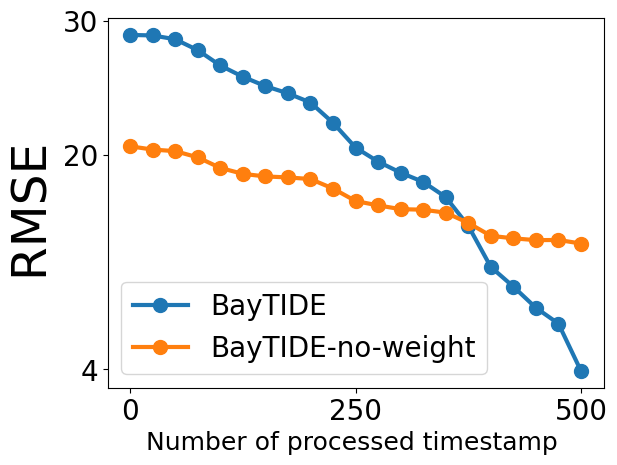

In [47]:
# plot the running rmse, with line and dots
# plt.figure(figsize=(10,10))
plt.plot(running_rmse,'o-', label = "BayTIDE", linewidth=3,markersize=10)
plt.plot(running_rmse_no_weight,'o-', label = "BayTIDE-no-weight",linewidth=3, markersize=10)

plt.xticks(ticks=[0,10, 20],labels=[0, 250,500],fontsize=20)
plt.xlabel("Number of processed timestamp ",fontsize=18)

plt.yticks(ticks =[4,20,30],fontsize=20)
plt.ylabel("RMSE ",fontsize=35)

plt.legend(fontsize=20)

plt.savefig("./figs/running_rmse-guangzhou.pdf",bbox_inches='tight')